In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
N0_file = "cache/_N0/N0_my_Planck_14_14_TQU.npy"

In [3]:
fisher = Fisher(N0_file)
M_path = "cache/_M"
fisher.setup_bispectra(M_path)

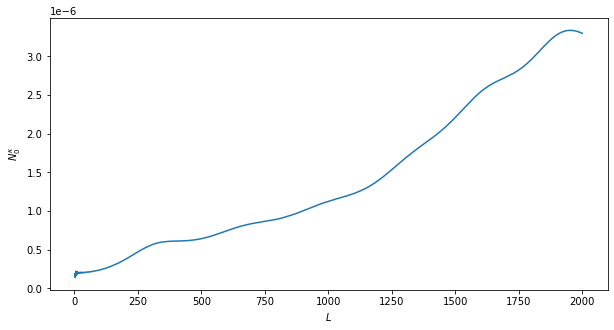

In [4]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

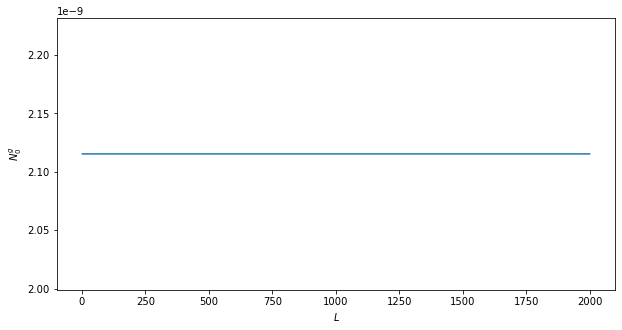

In [5]:
N0_gal = fisher.noise.get_gal_shot_N(ellmax=ellmax)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_gal[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{g}$")
plt.show()

In [6]:
Lmaxs = [2000, 4000, 4000, 4000, 4000, 4000]
dL = 10
Ntheta = 10
f_skys = [0.7, 0.65, 0.06, 0.4, 0.5, 0.4]
exps = ["my_Planck", "my_SA", "my_SPT", "my_S4", "my_S5", "my_SO"]

In [7]:
# Vectorised method
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky)
    print(exp)
    print(f"S/N = {np.sqrt(F_gal_rot)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.09187690527529142
---------------------------
my_SA
S/N = 0.3051906847635369
---------------------------
my_SPT
S/N = 0.22814888866634267
---------------------------
my_S4
S/N = 1.0170804921638597
---------------------------
my_S5
S/N = 2.249183144240543
---------------------------
my_SO
S/N = 0.5955780157130082
---------------------------
Time = 5.1645050048828125


In [8]:
# Increase dL -> 10
# Array method
dL = 10
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    Ls, F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
    print(exp)
    print(f"S/N = {np.sqrt(np.sum(F_gal_rot))}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.09187690527529144
---------------------------
my_SA
S/N = 0.3051906847635367
---------------------------
my_SPT
S/N = 0.22814888866634256
---------------------------
my_S4
S/N = 1.0170804921638597
---------------------------
my_S5
S/N = 2.2491831442405426
---------------------------
my_SO
S/N = 0.5955780157130081
---------------------------
Time = 14.633646249771118


In [9]:
# Vectorised method
dL = 10
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky)
    print(exp)
    print(f"S/N = {np.sqrt(F_gal_conv_rot)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.5040670125269757
---------------------------
my_SA
S/N = 2.657236068709913
---------------------------
my_SPT
S/N = 2.8431618086077117
---------------------------
my_S4
S/N = 15.395923316081213
---------------------------
my_S5
S/N = 37.282112370958565
---------------------------
my_SO
S/N = 7.683402239874388
---------------------------
Time = 8.959492921829224


In [10]:
# Increase dL -> 10
# Array method
dL = 10
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    Ls, F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
    print(exp)
    print(f"S/N = {np.sqrt(np.sum(F_gal_conv_rot))}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.5040670125269756
---------------------------
my_SA
S/N = 2.657236068709913
---------------------------
my_SPT
S/N = 2.843161808607711
---------------------------
my_S4
S/N = 15.395923316081209
---------------------------
my_S5
S/N = 37.28211237095856
---------------------------
my_SO
S/N = 7.683402239874387
---------------------------
Time = 29.686591863632202


Time = 115.49929904937744


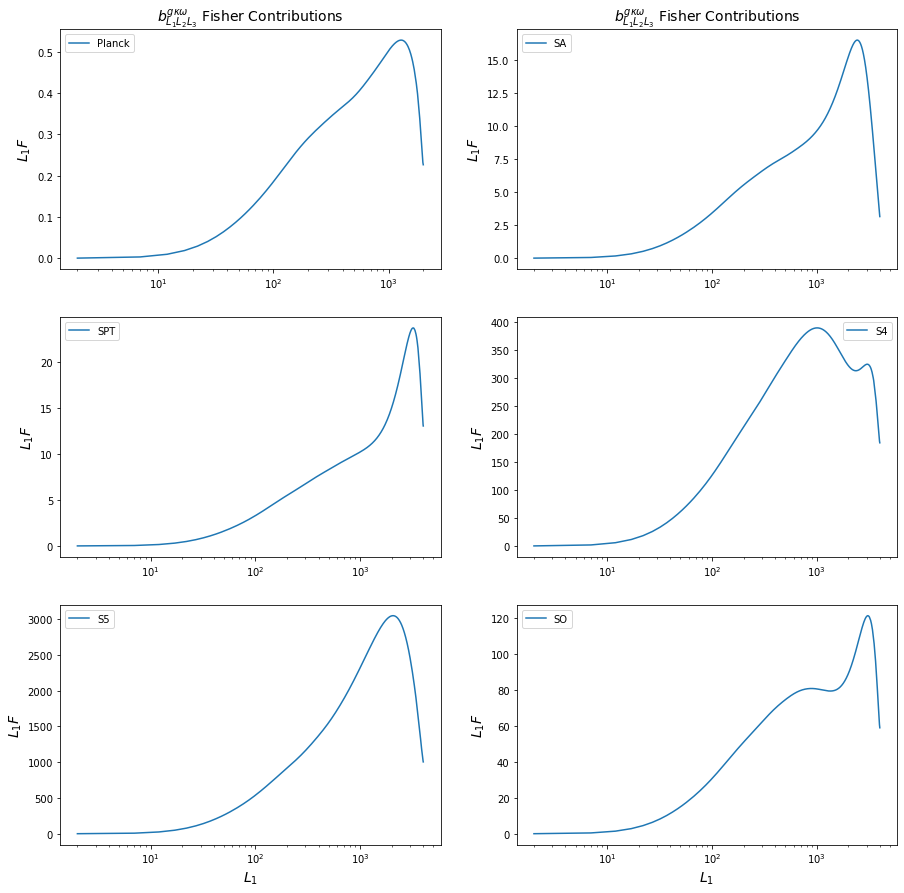

In [11]:
# Increase dL -> 10
# Array method
dL = 5
t0 = time.time()
fig, ax = plt.subplots(3,2, figsize=[15, 15])
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    Ls_rot, F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_skys[iii], arr=True)
    row = iii//2
    if iii % 2: col = 1
    else: col = 0
    ax[row][col].semilogx(Ls_rot, Ls_rot*F_gal_conv_rot, label=f"{exp[3:]}")
    ax[row][col].set_ylabel("$L_1F$", fontsize=14)
    ax[row][col].legend()
    if row == 0:
        ax[row][col].set_title("$b_{L_1L_2L_3}^{g\kappa\omega}$ Fisher Contributions", fontsize=14)
    elif row == 2:
        ax[row][col].set_xlabel("$L_1$", fontsize=14)
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.show()

In [16]:
def get_Ls(ellmax, Nells):    
    part1 = 200
    part2 = 1500
    if ellmax <= part1:
        return np.linspace(2, part1, Nells)
    if ellmax <= part2:
        ells_part1 = np.linspace(2, part1, Nells // 2)
        Nells_remaining = Nells - np.size(ells_part1)
        ells_remaining = np.linspace(part1 + 1, ellmax + 1, Nells_remaining)
        return np.concatenate((ells_part1, ells_remaining))
    ells_part1 = np.linspace(2, part1, Nells//3)
    ells_part2 = np.linspace(part1 + 1, part2, Nells//3)
    Nells_remaining = Nells - np.size(ells_part1) - np.size(ells_part2)
    ells_remaining = np.linspace(part2 + 1, ellmax + 1, Nells_remaining)
    return np.concatenate((ells_part1, ells_part2, ells_remaining)).astype("double")

0.5011579256553625
1476.3818181818183
2.6433800879387794
2803.395209580838
2.8331709195766446
3267.4670658682635
15.337419171196352
2683.634730538922
37.16417223730224
2803.395209580838
7.652188255304732
3012.9760479041915
Time = 46.85411715507507


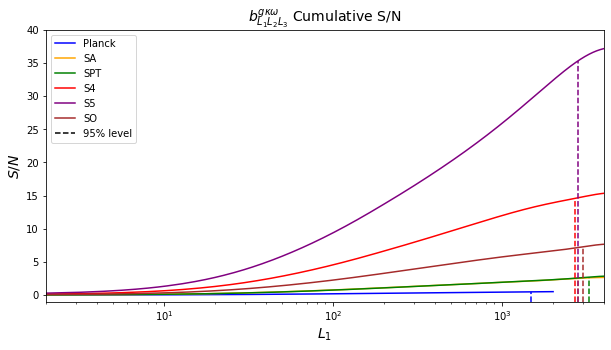

In [17]:
# Sample method
# Nell -> 500
Nells = 500
level = 0.95
colors = ["blue", "orange", "green", "red", "purple", "brown"]
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    Ls = get_Ls(Lmaxs[iii], Nells)
    F = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_skys[iii], arr=True)
    SNs = np.sqrt(np.cumsum(F))
    plt.semilogx(Ls, SNs, label=f"{exp[3:]}", color=colors[iii])
    SN = SNs[-1]
    print(SN)
    L_level = Ls[SNs < level*SN][-1]
    print(L_level)
    L_level_index = np.where(Ls==L_level)[0][0]
    L_levels = np.array([L_level, L_level])
    SN_levels = np.array([-1, SNs[L_level_index]])
    plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.title("$b_{L_1L_2L_3}^{g\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(-1, 40)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()